# Libraries to install 📕

In [17]:
#pip install nltk
#pip install wordcloud
#pip install plotly

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Extract words and sentences from text

Here is an extract of the bible called text_b. The first step is to clean the text on a sample of the bible.

There are numbers, punctuations, lower and higher case.

In [19]:
text_b = '''17 For they also shall go down with him to
hell to them that are slain by the sword; and the
arm of every one shall sit down under his shadow
in the midst of the nations.
18 To whom art thou like, O thou that art
famous and lofty among the trees of pleasure?
Behold, thou art brought down with the trees of
pleasure to the lowest parts of the earth: thou
shalt sleep in the midst of the uncircumcised,
with them that are slain by the sword: this is
Pharao, and all his multitude, saith the Lord
God.
Chapter 32
And it came to pass in the twelfth year, in the
twelfth month, in the first day of the month, that
the word of the Lord came to me, saying:
2 Son of man, take up a lamentation for
Pharao the king of Egypt, and say to him: Thou
art like the lion of the nations, and the dragon
that is in the sea: and thou didst push with
the horn in thy rivers, and didst trouble the waters
with thy feet, and didst trample upon their
streams.
3 Therefore, thus saith the Lord God: I will
spread out my net over thee with the multitude
of many people, and I will draw thee up in my
net.
4 And I will throw thee out on the land, I will
cast thee away into the open field and I will cause
all the fowls of the air to dwell upon thee, and I
will fill the beasts of all the earth with thee.
5 And I will lay thy 
esh upon the mountains,
and will fill thy hills with thy corruption,'''

📝 Let' first separate the text by words (It is the first step in other case, we will only have letters for the cleaning). This is called Tokenization.

We use the NLTK package and word_tokenize for this. We obtain a list of words.

In [34]:
tokens_b = word_tokenize(text_b)

📝 Let's put the list of words in lower case

In [35]:
lower_text_b = [x.lower() for x in tokens_b]

📝 In this specific text, there are numbers on each paragraph which will not be usefull to understand it. So we will remove it.

We use regex to do that. isdigit() allows to detect digits in text.

In [36]:
no_integers = [x for x in lower_text_b if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

📝 Let's now remove the punctuation from the text. We import the "string" package and use regex to remove the punctuation.

As the punctuation is replaced by empty strings, we can also filter the list to remove all empty strings

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
no_string = list(filter(None,[re.compile('[%s]' % re.escape(string.punctuation)).sub('', j)for j in no_integers]))

📝 Now let's visualise the words by frequency using wordcloud

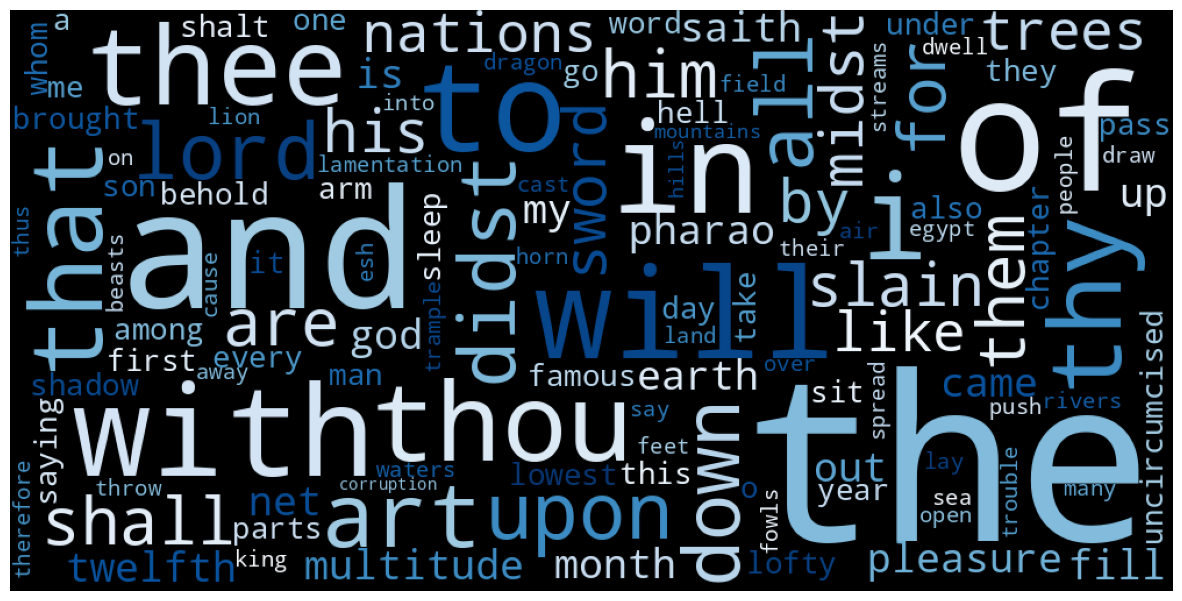

In [32]:
word_could_dict=Counter(no_string)
wordcloud = WordCloud(width = 1000, height = 500, colormap = "Blues").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig('words_from_bible_without stop.jpg')

📝 We can see that some words of the common english language are dominant such as "the", "and", "i", "will". They therefore hide the less common words.

These words are called stopwords and can be find in the following list:

In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

As it is a old text, some words are also specific to the old english vocabulary

In [27]:
old_english = ["thy", "thou", "thee", "shall", "ye", "thyne", "didst", "art"]

In [28]:
removed_stopwords = [word for word in no_string if not word in stopwords.words('english') and not word in old_english]

📝 Counter will create a dictionnary containing the most frequent words which will be used by wordcloud and generate the figure based on frequency.

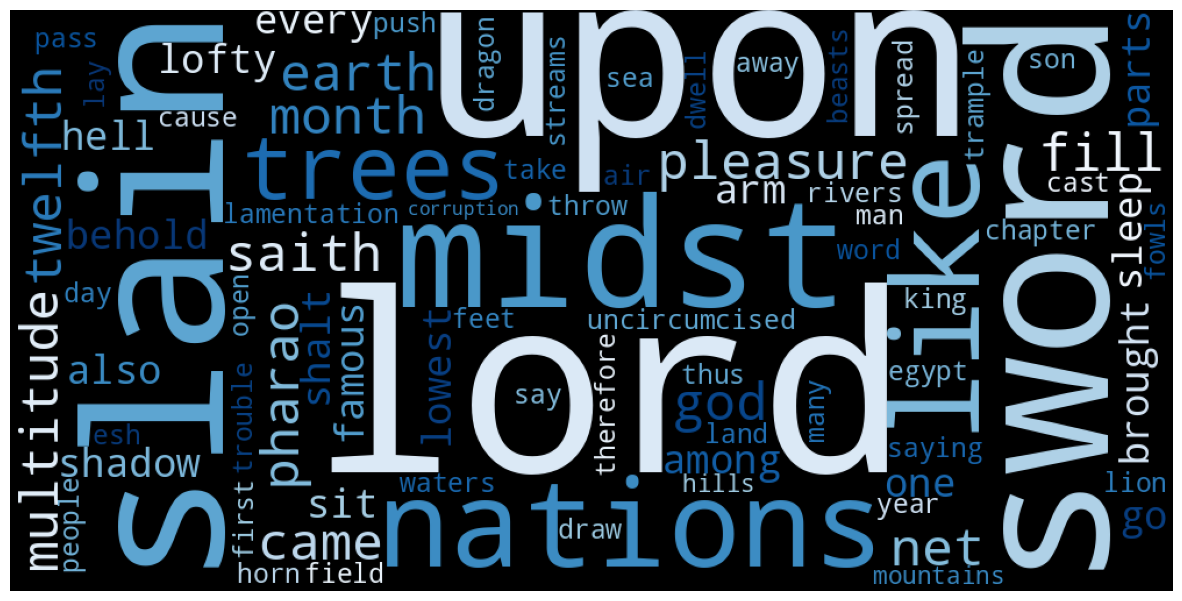

In [33]:
word_could_dict=Counter(removed_stopwords)
wordcloud = WordCloud(width = 1000, height = 500, colormap = "Blues").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig('words_from_bible.jpg');

📝 We can determine the exact number of words using the following line of code

In [43]:
pd.DataFrame.from_dict(dict(Counter(removed_stopwords)), orient='index').reset_index().sort_values(by=0, ascending=False)

,index,0
29,lord,3
58,upon,3
16,trees,2
63,net,2
36,month,2
...,...,...
44,lamentation,1
45,king,1
46,egypt,1
47,say,1
